# Knjige
## Projektna naloga

#### Analizirala bom najbolj priljubljene knjige zadnjih 100 let (med leti 1920 in 2020) iz strani Goodreads z uporabo Pandas.

#### Za vsako knjigo je zajeto:
- id knjige
- naslov
- zbirka (če je v zbirki)
- avtor in njegov id
- ocena
- število ocen
- število glasov in
- leto izida

#### Hipoteze:
- Katere zbirke se največkrat pojavijo?
- Kateri avtorji se največkrat pojavijo?
- Ali večje število ocen pomeni boljšo oceno?
- Katero leto je bilo najbolje ocenjeno?
- Katero leto je imelo največ ocen?
- Ali imajo boljšo oceno zbirke ali samostojne knjige?
- Kateri so najbolje ocenjeni avtorji?
- Kateri so največkrat ocenjeni avtorji?

In [1]:
import pandas as pd
pd.options.display.max_rows = 10
%matplotlib inline
import os.path
csv_datoteka = os.path.join("obdelani-podatki", "knjige.csv")
knjige = pd.read_csv(csv_datoteka)

### Razpredelnica s podatki

In [2]:
knjige

,id,naslov,zbirka,id_avtorja,avtor,ocena,stevilo_ocen,leto,glasovi
0,16343,The Mysterious Affair at Styles,Hercule Poirot,123715,Agatha Christie,3.99,256238,1920,465296
1,53835,The Age of Innocence,NaN,16,Edith Wharton,3.95,139727,1920,315835
2,46165,This Side of Paradise,NaN,3190,F. Scott Fitzgerald,3.66,62463,1920,159803
3,325421,The Story of Doctor Dolittle,Doctor Dolittle,70762,Hugh Lofting,3.97,45609,1920,62518
4,9784,Women in Love,NaN,17623,D.H. Lawrence,3.67,29337,1920,59323
...,...,...,...,...,...,...,...,...,...
20195,49217470,"Brave Girl, Quiet Girl",NaN,126447,Catherine Ryan Hyde,4.23,13258,2020,38464
20196,51941088,The Comeback,NaN,19475743,Ella Berman,3.82,4931,2020,37904
20197,49381341,Peace Talks,The Dresden Files,10746,Jim Butcher,4.21,22215,2020,71539
20198,52287403,Devoted,NaN,9355,Dean Koontz,4.14,18047,2020,58070


### Hipoteze

#### 1. Katere zbirke se največkrat pojavijo?

Kolikokrat se vsaka zbirka pojavi:

In [3]:
knjige.groupby('zbirka').size()

zbirka
1-800-Where-R-You                1
87th Precinct                    7
A Bridge of Leaves               1
A Course in Religion             1
A Court of Thorns and Roses      4
                                ..
Zones of Thought                 2
xxxHOLiC                         1
À la recherche du temps perdu    1
İnce Memed                       1
御手洗潔                             1
Length: 2234, dtype: int64

Razporejene po številu pojavitev:

In [4]:
knjige.groupby('zbirka').size().sort_values()

zbirka
1-800-Where-R-You                                       1
Pern Publication Order                                  1
Percy Jackson and the Olympians: The Graphic Novels     1
Percy Jackson & Kane Chronicles Crossover               1
Penn Cage                                               1
                                                       ..
Discworld                                              39
Perry Mason                                            40
Nero Wolfe                                             43
Hercule Poirot                                         44
Nancy Drew Mystery Stories                             56
Length: 2234, dtype: int64

10 zbirk z največ pojavitvami urejene v graf:

<AxesSubplot:xlabel='zbirka'>

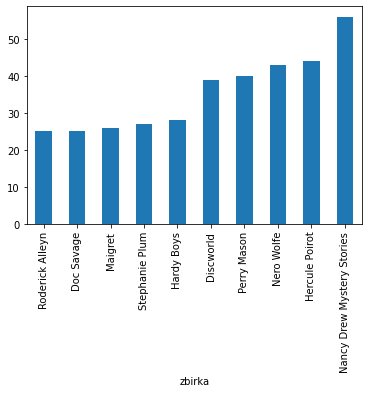

In [5]:
knjige.groupby('zbirka').size().sort_values().tail(10).plot.bar()

Največkrat se pojavi zbirka Nancy Drew Mystery Stories s 56 pojavitvami, nato Hercule Poirot s 44 in Nero Wolfe s 43. 

#### 2. Kateri avtorji se največkrat pojavijo?

Kolikokrat se vsak avtor(oz. njegov id) pojavi:

In [6]:
najveckrat_avtorji = knjige.groupby('id_avtorja').size().sort_values().to_frame('pojavitve')
najveckrat_avtorji

,pojavitve
id_avtorja,
100439,1
228526,1
227840,1
227470,1
227159,1
...,...
9494,87
3389,87
625,89


Zdaj imamo samo kolikokrat se pojavi id avtroja. Da dobimo zraven imena ustarimo novo razpredelnico z imeni avtorjev in njihovimi id-ji:

In [7]:
imena_avtorjev = knjige[['id_avtorja', 'avtor']]
imena_avtorjev

,id_avtorja,avtor
0,123715,Agatha Christie
1,16,Edith Wharton
2,3190,F. Scott Fitzgerald
3,70762,Hugh Lofting
4,17623,D.H. Lawrence
...,...,...
20195,126447,Catherine Ryan Hyde
20196,19475743,Ella Berman
20197,10746,Jim Butcher
20198,9355,Dean Koontz


Sedaj ju še združimo:

In [8]:
imena_in_pojavitve = pd.merge(najveckrat_avtorji, imena_avtorjev, left_on='id_avtorja', right_on='id_avtorja').drop_duplicates().reset_index(drop=True)
imena_in_pojavitve

,id_avtorja,pojavitve,avtor
0,100439,1,Jane Bowles
1,228526,1,Donald R. Morris
2,227840,1,Jean Estoril
3,227470,1,Win Blevins
4,227159,1,Hiroyuki Takei
...,...,...,...
7655,9494,87,H.P. Lovecraft
7656,3389,87,Stephen King
7657,625,89,Nora Roberts
7658,10657,107,Enid Blyton


Največkrat se pojavi Agathe Christie s kar 169 knjigami. Naslednja je Enid Blyton z približno tretjino manj (107). To sta edina avtorja ki se pojavita več kot stokrat, sledi jima Nora Roberts z 89 knjigami.
Poleg tega izvemo še, da čeprav je vseh knjig 20200, je različnih avtorjev samo 7660, torej je v povprečju vsak avtor napisal več kot 2 knjigi.

In [9]:
20200/ 7660

2.637075718015666

#### 3. Kateri so najbolje ocenjeni avtorji?

Najprej izračunamo povprečje za vsakega avtorja in iz razpredelnice izberemo samo id avtorja in njegovo povprečno oceno:

In [10]:
povprecna_ocena_avtorja = knjige.groupby('id_avtorja').mean().sort_values('ocena').reset_index()[["id_avtorja", "ocena"]]
povprecna_ocena_avtorja

,id_avtorja,ocena
0,277404,2.070000
1,1124248,2.710000
2,682865,2.800000
3,4285032,2.810000
4,264856,2.830000
...,...,...
7655,13778,4.709412
7656,19527332,4.710000
7657,4094635,4.720000
7658,18851256,4.770000


Podobno kot prej to združimo z razpredelnico imena_avtorjev, da dobimo njihova imena:

In [11]:
ime_avtorja_in_pov_ocena = pd.merge(povprecna_ocena_avtorja, imena_avtorjev, left_on='id_avtorja', right_on='id_avtorja').drop_duplicates().reset_index(drop=True)
ime_avtorja_in_pov_ocena

,id_avtorja,ocena,avtor
0,277404,2.070000,Anne Carroll Moore
1,1124248,2.710000,Grace Moon
2,682865,2.800000,Ernest Vincent Wright
3,4285032,2.810000,Grace Taber Hallock
4,264856,2.830000,Margaret Sanger
...,...,...,...
7655,13778,4.709412,Bill Watterson
7656,19527332,4.710000,Chanel Miller
7657,4094635,4.720000,John Andrew Simpson
7658,18851256,4.770000,Mary Loyola


Najboljšo povprečno oceno ima Mustafa Kemal Atatürk - 4.79, najmanjšo pa Anne Carroll Moore - 2.07. Ampak ali je ta povprečna ocena odvisno od tega koliko knjig je avtor napisal?

In [12]:
povp_ocena_in_pojavitve = pd.merge(imena_in_pojavitve[['id_avtorja', 'pojavitve']], ime_avtorja_in_pov_ocena, left_on='id_avtorja', right_on='id_avtorja').sort_values('ocena')
povp_ocena_in_pojavitve

,id_avtorja,pojavitve,ocena,avtor
674,277404,1,2.070000,Anne Carroll Moore
2610,1124248,1,2.710000,Grace Moon
2844,682865,1,2.800000,Ernest Vincent Wright
3012,4285032,1,2.810000,Grace Taber Hallock
5625,264856,2,2.830000,Margaret Sanger
...,...,...,...,...
7516,13778,17,4.709412,Bill Watterson
2187,19527332,1,4.710000,Chanel Miller
3019,4094635,1,4.720000,John Andrew Simpson
2161,18851256,1,4.770000,Mary Loyola


<AxesSubplot:xlabel='pojavitve', ylabel='ocena'>

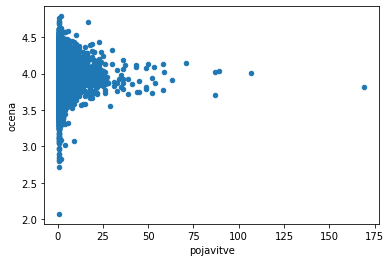

In [13]:
povp_ocena_in_pojavitve.plot.scatter(x='pojavitve', y='ocena')

Vidimo, da imajo avtorji z samo 1 knjigo zelo razporejene ocene, avtorji z več kot 25 knjigami pa imajo povprečno oceno okoli 4.

#### 4. Kateri so največkrat ocenjeni avtorji?

In [14]:
avtorji_po_stevilu_ocen = knjige.groupby('id_avtorja').sum().sort_values('stevilo_ocen').reset_index()[["id_avtorja", "stevilo_ocen"]]
avtorji_po_stevilu_ocen

,id_avtorja,stevilo_ocen
0,1830746,7
1,580393,7
2,3341792,8
3,6643050,8
4,1010053,12
...,...,...
7655,15872,8344782
7656,941441,10797229
7657,153394,11862467
7658,3389,12672412


In [15]:
avtor_ocene = pd.merge(avtorji_po_stevilu_ocen, imena_avtorjev, left_on='id_avtorja', right_on='id_avtorja').drop_duplicates().reset_index(drop=True)
avtor_ocene

,id_avtorja,stevilo_ocen,avtor
0,1830746,7,Heruy Wolde Selassie
1,580393,7,James Truslow Adams
2,3341792,8,Elizabeth M. Ricker
3,6643050,8,Roy C McHenry
4,1010053,12,Wolfgang Köhler
...,...,...,...
7655,15872,8344782,Rick Riordan
7656,941441,10797229,Stephenie Meyer
7657,153394,11862467,Suzanne Collins
7658,3389,12672412,Stephen King


Največkrat je ocenjena J.K.Rowling, ki ima več kot 24 milijonov ocen. Naslednji za njo je Stephen King s pol manj ocen, 12 milijonov, sledijo mu Suzanne Collins, Stephanie Meyer in Rick Riordan.

#### 5. Katero je bilo najboljše ocenjeno leto?

In [16]:
letne_ocene = knjige.groupby('leto').mean().ocena.to_frame('povprecna_letna_ocena')
letne_ocene

,povprecna_letna_ocena
leto,
1920,3.89090
1921,3.83375
1922,3.89240
1923,3.85975
1924,3.83690
...,...
2016,3.99445
2017,4.02805
2018,3.99300


In [17]:
letne_ocene.sort_values('povprecna_letna_ocena')

,povprecna_letna_ocena
leto,
1921,3.83375
1924,3.83690
1923,3.85975
1928,3.86045
1925,3.88280
...,...
1988,4.04010
1982,4.04575
2012,4.04930


Najboljše je bilo ocenjeno leto 1996, najslabše pa 1921, vendar je razlika med njima razmeroma majhna. Poglejmo še graf:

<AxesSubplot:xlabel='leto'>

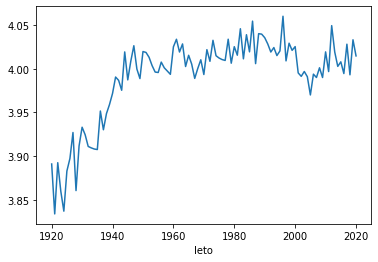

In [18]:
knjige.groupby('leto').mean().ocena.plot()

Povprečna ocena je skozi leta naraščala, po letu 1996 začela upadati, po 2005 pa je ponovno začela naraščati. Čeprav zgleda razlika med najbolje in naslabše ocenjenim letom na grafu velika, je dejanska razlika samo približno 0.20, kar ni tako veliko.

#### 6. Katero leto je imelo največ ocen?

In [19]:
letno_stevilo_ocen = knjige.groupby('leto').sum().stevilo_ocen.to_frame('stevilo_ocen_na_leto')
letno_stevilo_ocen

,stevilo_ocen_na_leto
leto,
1920,771613
1921,281047
1922,1505918
1923,614118
1924,516467
...,...
2016,17527915
2017,15566998
2018,15738021


In [20]:
letno_stevilo_ocen.sort_values('stevilo_ocen_na_leto')

,stevilo_ocen_na_leto
leto,
1921,281047
1924,516467
1933,539282
1944,604113
1923,614118
...,...
2009,26291189
2008,28918915
2011,32037492


<AxesSubplot:xlabel='leto'>

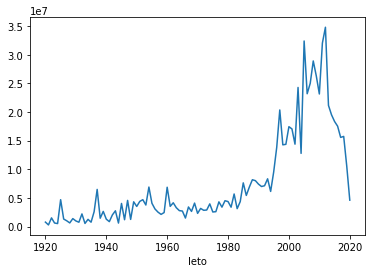

In [21]:
knjige.groupby('leto').sum().stevilo_ocen.plot()

Največ ocen ima leto 2012, najmanj pa 1921. Število ocen skozi leta narašča. Glede na to da ima povprečno vsako leto več ocen in da je ocena boljša (po prejšnji hipotezi) ali obstaja povezava med njima?

#### 7. Ali večje število ocen pomeni boljšo oceno?

<AxesSubplot:xlabel='stevilo_ocen', ylabel='ocena'>

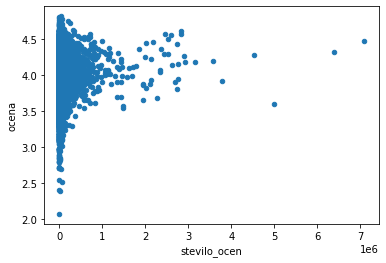

In [22]:
knjige.sort_values('ocena').plot.scatter(x='stevilo_ocen', y='ocena')

Iz grafa se vidi, imajo knjige z večjim številom ocen navadno tudi višjo oceno. Vidimo, da imajo knjige z več kot tremi milijoni ocenami povprečno višjo oceno, medtem ko imajo knjige z manj kot milijonom ocen zelo razporejene ocene.

In [32]:
povprecna_ocena_knjig_z_vec_kot_3M_ocen = knjige[knjige.stevilo_ocen >= 3000000].mean().ocena
povprecna_ocena_knjig_z_vec_kot_3M_ocen

4.1414285714285715

In [34]:
povprecna_ocena_knjig_z_manj_kot_1M_ocen = knjige[knjige.stevilo_ocen < 1000000].mean().ocena
povprecna_ocena_knjig_z_manj_kot_1M_ocen

3.989712837837838

#### 8. Ali imajo boljšo oceno zbirke ali samostojne knjige?

Najprej poglejmo koliko knjig je v zbirkah, koliko pa ne:

In [24]:
stevilo_knjig_v_zbirkah = knjige.count().zbirka
stevilo_knjig_v_zbirkah

5501

In [25]:
stevilo_knjig_brez_zbirke = 20200 - 5501
stevilo_knjig_brez_zbirke

14699

Izmed vseh knjig jih je približno četrtina v zbirki in tri četrine samostojnih.

In [26]:
knjige_brez_zbirke = knjige[pd.isnull(knjige['zbirka'])].reset_index(drop=True)
knjige_brez_zbirke

,id,naslov,zbirka,id_avtorja,avtor,ocena,stevilo_ocen,leto,glasovi
0,53835,The Age of Innocence,NaN,16,Edith Wharton,3.95,139727,1920,315835
1,46165,This Side of Paradise,NaN,3190,F. Scott Fitzgerald,3.66,62463,1920,159803
2,9784,Women in Love,NaN,17623,D.H. Lawrence,3.67,29337,1920,59323
3,11376,Main Street,NaN,7330,Sinclair Lewis,3.77,23864,1920,50987
4,4662,The Short Stories,NaN,3190,F. Scott Fitzgerald,4.23,13917,1920,33157
...,...,...,...,...,...,...,...,...,...
14694,51373979,He Started It,NaN,17310869,Samantha Downing,3.59,7065,2020,39449
14695,48814109,The Lions of Fifth Avenue,NaN,14903705,Fiona Davis,3.97,10035,2020,47784
14696,49217470,"Brave Girl, Quiet Girl",NaN,126447,Catherine Ryan Hyde,4.23,13258,2020,38464
14697,51941088,The Comeback,NaN,19475743,Ella Berman,3.82,4931,2020,37904


In [27]:
povprecje_knjige_brez_zbirke = knjige_brez_zbirke.mean()
povprecje_knjige_brez_zbirke

id              4.702102e+06
zbirka                   NaN
id_avtorja      1.101726e+06
ocena           3.979865e+00
stevilo_ocen    2.819723e+04
leto            1.964951e+03
glasovi         5.492229e+04
dtype: float64

In [28]:
knjige_v_zbirki = knjige[pd.notnull(knjige['zbirka'])].reset_index(drop=True)
knjige_v_zbirki

,id,naslov,zbirka,id_avtorja,avtor,ocena,stevilo_ocen,leto,glasovi
0,16343,The Mysterious Affair at Styles,Hercule Poirot,123715,Agatha Christie,3.99,256238,1920,465296
1,325421,The Story of Doctor Dolittle,Doctor Dolittle,70762,Hugh Lofting,3.97,45609,1920,62518
2,6217,Kristin Lavransdatter,Kristin Lavransdatter,4203,Sigrid Undset,4.29,9017,1920,31771
3,765300,Glinda of Oz,Oz,3242,L. Frank Baum,3.93,5829,1920,14443
4,6220,The Wreath,Kristin Lavransdatter,4203,Sigrid Undset,4.02,5301,1920,13910
...,...,...,...,...,...,...,...,...,...
5496,49884715,Find Me,Inland Empire,4327517,Anne Frasier,4.15,18672,2020,51844
5497,51518972,Majesty,American Royals,13499819,Katharine McGee,3.88,13125,2020,45806
5498,43565384,The Night Country,The Hazel Wood,8384949,Melissa Albert,3.74,7094,2020,39014
5499,49381341,Peace Talks,The Dresden Files,10746,Jim Butcher,4.21,22215,2020,71539


In [29]:
povprecje_knjige_v_zbirki = knjige_v_zbirki.mean()
povprecje_knjige_v_zbirki

id              5.030567e+06
id_avtorja      1.023958e+06
ocena           4.017673e+00
stevilo_ocen    6.283883e+04
leto            1.983490e+03
glasovi         1.045242e+05
dtype: float64

Boljšo oceno imajo knjige v zbirki (vendar je razlika zelo majhna), vendar imajo povprečno veliko večje število ocen knjige v zbirki.